# 1 dimensional laws

In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf

2022-04-04 15:07:44.249860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-04 15:07:44.249920: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Wolfram's 256 Rules

These are all cellular automaton rules for a 1-d array with only neares neighbour interaction. There are therefore only three cells (L,C,R) determining the outcome of one cell (C). This gives 2^3=8 possible combinations that can give rise to an outcome of 2 possibilities. Thus there are 2^8=256 possible rules. 

The following function generates each of these rules.
 
Input:  
num = number of rule  
inp = string of input bits   
t = number of timesteps calculated  

Output: an array of arrays each for one timestep beginning with the input array. 

The boudary conditions are periodic
        

In [4]:
def CellularAutomata(num,inp,t):
    bnum = np.flip(np.fromiter(np.binary_repr(num,width=8),dtype=int))
    out = [np.fromiter(inp,dtype=int)]
    lin = len(inp)
    currinp = inp
    for n in range(t):
        outnow = []
        for i in range(len(inp)):
            outnow = np.append(outnow,bnum[int(str(currinp[(i-1)%lin])+str(currinp[(i)%lin])+str(currinp[(i+1)%lin]),2)])

        currinp =''.join([str(int(elem)) for elem in outnow])
        out = np.append(out,[outnow],axis=0)
    return(out)


## Generating Data

In [415]:
N=1000 #batch size
L=3 #Length of box
rule= 170
time = 1

x_train=[]
y_train=[]


for i in range(N):
    #x=[0,0,0]
    #x[np.random.randint(0,3)]=1
    x=np.random.randint(0,2,L).astype(float)
    x_train.append(np.copy(x))
    #y_train.append(np.copy(CellularAutomata(rule,''.join([str(int(elem)) for elem in x]),time)[time]))
    y_train.append(np.copy(CellularAutomata(rule,''.join([str(int(elem)) for elem in x]),time)[time,1]))
    #print(''.join([str(int(elem)) for elem in x]),CellularAutomata(rule,''.join([str(int(elem)) for elem in x]),time)[time,0])

#for i in range(20):
 #   print(x_train[i],y_train[i])
    
x_train = np.array(x_train).reshape(N,L,1)
y_train = np.array(y_train).reshape(N,1)
#print(x_train.shape,y_train.shape)
#print(x_train[0],y_train[0],CellularAutomata(rule,''.join([str(int(elem)) for elem in x_train[0]]),time)[time])

## Models
useful resource for understanding what is going on:  
Padding https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/  
Guide to 2d conv layers https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/  
Guide to 1d conv layers https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/  
shapes, dimensions and units https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc  


### Dense layers

### 1-D Convolutional layer

Tutorial customb layers: https://www.tensorflow.org/tutorials/customization/custom_layers

In [451]:
class SimpleConv(tf.keras.layers.Layer):
    def __init__(self, num_neighbours):
        super(SimpleConv, self).__init__()
        self.num_neighbours = num_neighbours

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                      shape=[int(input_shape[-1]),
                                             self.num_neighbours])

    def call(self, inputs):
#        return tf.matmul(inputs, self.kernel)
        return tf.tensordot(inputs,self.kernel,axes=2)
layer = SimpleConv(3)
print(x_train[0:2])
print(layer(x_train[0:2]))
print(layer.get_weights())

[[[1.]
  [1.]
  [1.]]

 [[1.]
  [0.]
  [1.]]]
tf.Tensor([-1.1612104  -0.09187949], shape=(2,), dtype=float32)
[array([[-1.0905125, -1.0693309,  0.998633 ]], dtype=float32)]


In [437]:
#layer = SimpleConv()
inp = x_train[0:3]
print(inp)
#print(inp.shape)
#layer(inp)
#layer = tf.keras.layers.Conv1D(
#1,3, activation='relu', input_shape=((3,1)))
print(layer(inp))
print(layer.get_weights())

[[[1.]
  [1.]
  [1.]]

 [[1.]
  [0.]
  [1.]]

 [[0.]
  [0.]
  [1.]]]
3
tf.Tensor(
[[[0.        ]]

 [[0.        ]]

 [[0.07612252]]], shape=(3, 1, 1), dtype=float32)
[array([[[-0.9108751 ]],

       [[ 0.04261279]],

       [[ 0.07612252]]], dtype=float32), array([0.], dtype=float32)]


In [418]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer((3,1))) 
#model.add(SimpleConv())
model.add(tf.keras.layers.Conv1D(1,3, activation='relu', input_shape=((3,1))))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation="softmax"))
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 1, 1)              4         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1)                 0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Execute learning

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.5130
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 6.0875e-05 - accuracy: 0.5130
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 4.5015e-05 - accuracy: 0.5130
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 4.2961e-05 - accuracy: 0.5130
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 4.1224e-05 - accuracy: 0.5130
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 3.9418e-05 - accuracy: 0.5130
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 3.7601e-05 - accuracy: 0.5130
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 3.5811e-05 - accuracy: 0.5130
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 3.4076e-05 - accuracy: 0.5130
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 3.2375e-05 - 

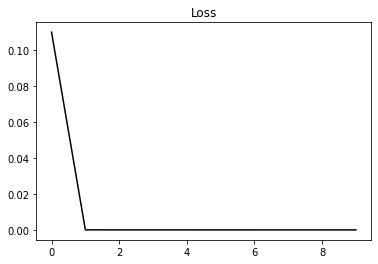

In [419]:
#loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
#loss_fn = tf.keras.metrics.BinaryAccuracy()


loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction="auto",name="sparse_categorical_crossentropy")


predictions = model(x_train).numpy()

loss_fn(y_train, predictions).numpy()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1),
              loss=loss_fn,
              #metrics=[tf.keras.metrics.BinaryAccuracy()]
              metrics=['accuracy']
                #metrics= [tf.keras.losses.CategoricalCrossentropy()]
             )
train_history = model.fit(x=x_train, y=y_train, epochs=10,verbose=1)
plt.title("Loss")
plt.plot(train_history.history['loss'], 'k')

In [430]:
print(x_train[3])
print(CellularAutomata(170,[1,0,0],1))
model(x_train)[3]

[[1.]
 [0.]
 [0.]]
[[1. 0. 0.]
 [0. 0. 1.]]


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [385]:
CellularAutomata(170,[1,0,0],1)

array([[1., 0., 0.],
       [0., 0., 1.]])